In [21]:
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
options(repr.matrix.max.rows = 6)
housing <- read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv")
housing

Rows: 35768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Address, Province
dbl (7): Price, Number_Beds, Number_Baths, Population, Latitude, Longitude, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Toronto,779900,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000
Toronto,799999,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000
Toronto,799900,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Halifax,419900,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753
Halifax,949900,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753
Halifax,592900,208 2842-2856 Gottingen,2,1,Nova Scotia,431479,44.8857,63.1005,86753


The first relationship we'd like to investigate is the one between average price, and the total number of listings and beds. Theories of supply and demand tell us that suppliers will be more willing to sell goods when they fetch higher prices.

`summarise()` has grouped output by 'city', 'province'. You can override using
the `.groups` argument.


city,province,population,count,average_price
<chr>,<chr>,<dbl>,<int>,<dbl>
Regina,Saskatchewan,226404,1915,337857.3
Saint John,New Brunswick,69895,458,395167.2
Regina,Ontario,226404,2,399900.0
⋮,⋮,⋮,⋮,⋮
Maple Ridge,British Columbia,90990,1282,1497012
Vancouver,British Columbia,2426160,1328,1851759
White Rock,British Columbia,109167,1175,2220780


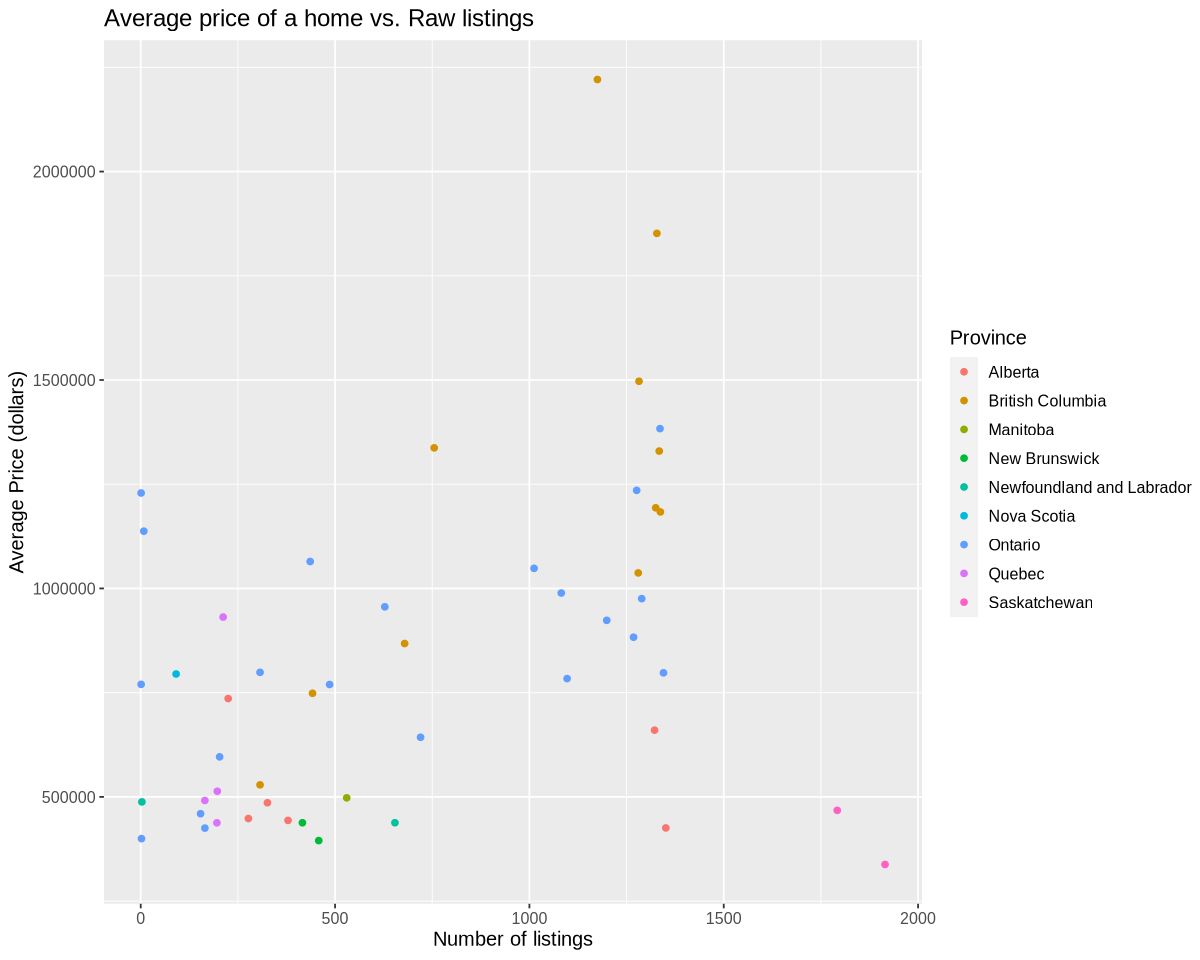

In [122]:
options(repr.plot.height = 8, repr.plot.width = 10)
housing <- housing |> clean_names()
housing_select <- housing |> select(-address,-latitude, -longitude)
summary <- housing_select |> group_by(city, province, population) |> summarize(count = n(), average_price = mean(price),) |> arrange(average_price)
summary


summary_plot <- ggplot(summary, aes(x = count, y = average_price, color = province)) + 
                geom_point()+
                labs(x = "Number of listings", y = "Average Price (dollars)", color = "Province")+
                theme(text = element_text(size = 12))+
                ggtitle("Average price of a home vs. Raw listings")
summary_plot

We can see here that there is a weak positive relationship between average housing price, and number of listings. We also see that the most expensive housing markets tend to be in British Columbia. However, it's important to realize that larger cities (by population) would naturally have more listings, and so a raw count of listings isn't enough to show that higher prices lead to people wanting to sell their houses more. So let's measure average price against listings per capita. Additionally let's also filter out all the data points with listings below 10, since they seem to be because of mistaken data entry

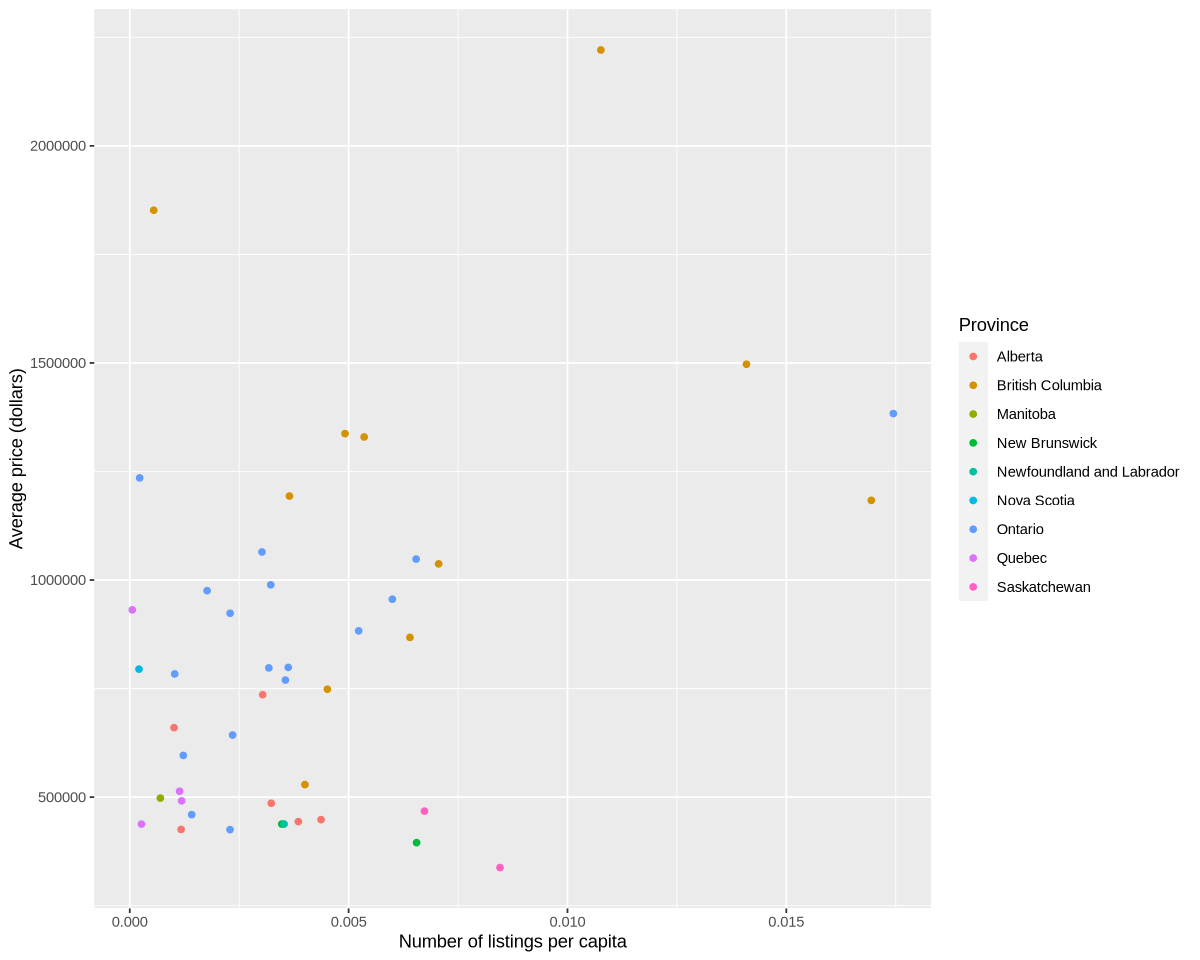

In [125]:
summary_pc <- summary |> filter(count > 10) |> mutate(count = count/population) 
summary_pc_plot <- ggplot(summary_pc, aes(x = count, y = average_price, color = province)) + geom_point() + labs(x = "Number of listings per capita", y = "Average price (dollars)", color = "Province")
summary_pc_plot

We now see a clear, albeit weak positive relationship between average price and listings per capita

I wanted to see if this same pattern also holds true for bedrooms per capita, plotted against the average price of a bedroom, mostly just to see if this relationship got any stronger.


`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


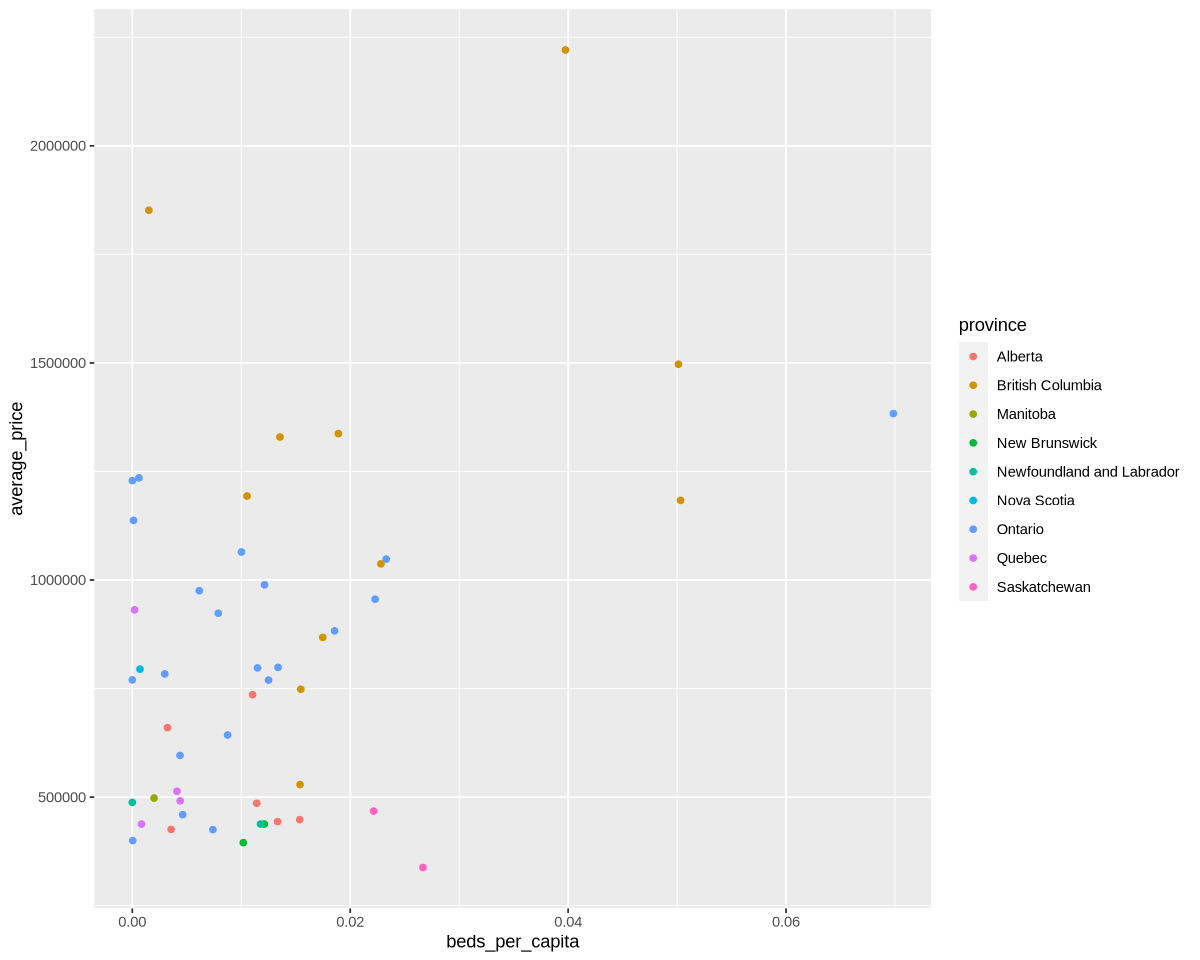

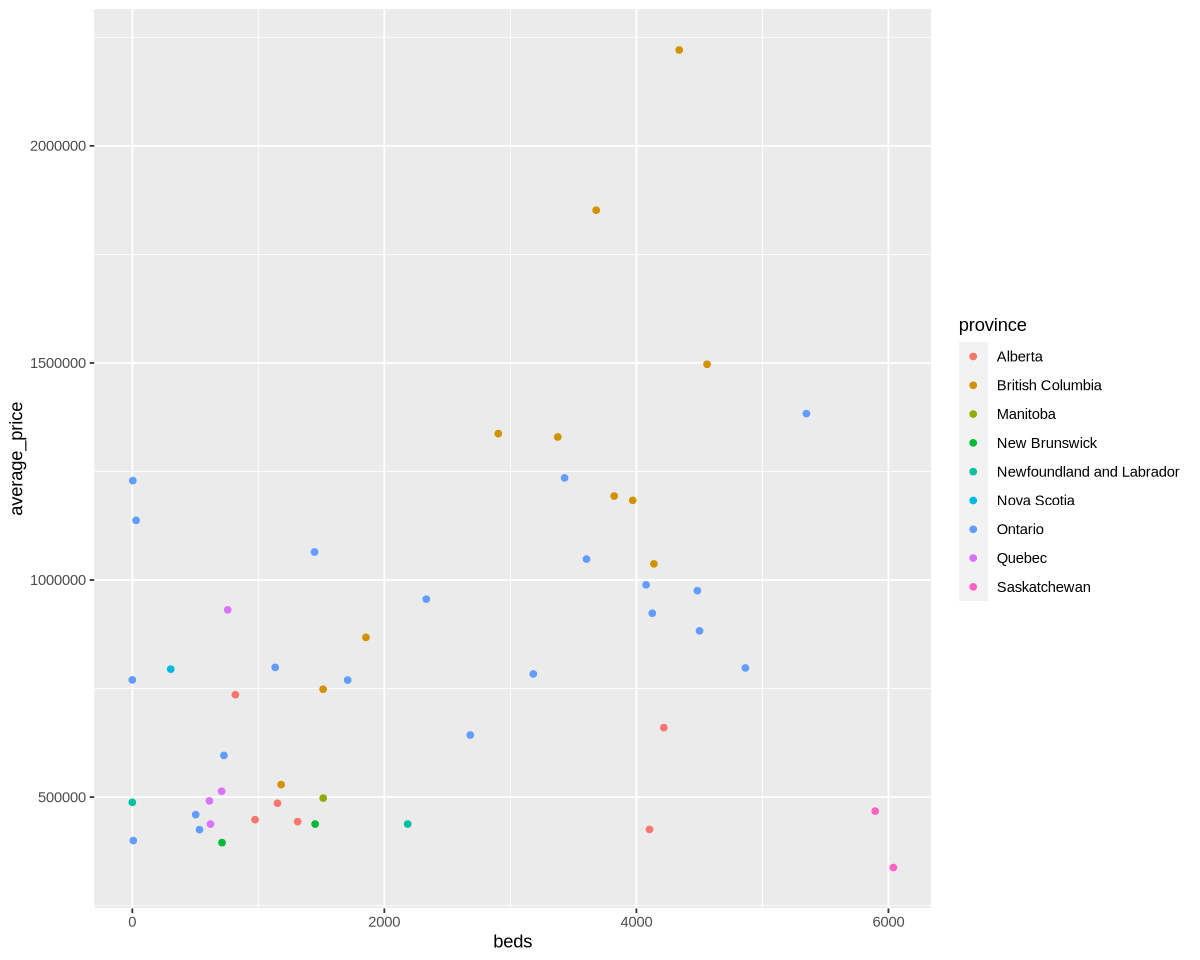

In [127]:
options(repr.plot.height = 8, repr.plot.width = 10)
housing_summary <- housing |> group_by(city, province) |> summarize(beds_per_capita = sum(number_beds/population), baths_per_capita = sum(number_baths/population), average_price = mean(price))
housing_summary_total <- housing |> group_by(city, province) |> summarize(beds = sum(number_beds), baths = sum(number_baths), average_price = mean(price))
housing_summary_plot <- ggplot(housing_summary, aes(x = beds_per_capita, y = average_price, color = province)) + geom_point()
housing_summary_total_plot <- ggplot(housing_summary_total, aes(x = beds, y = average_price, color = province)) +geom_point()
housing_summary_plot
housing_summary_total_plot

